#### Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

#### Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- BloodPressure: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skin fold thickness (mm)

- Insulin: 2-Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction: Diabetes pedigree function

- Age: Age (years)

- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

#### Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

(Note: Do not focus on visualization aspects when working with SAS)

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population

b)	Scatter charts between relevant variables to analyse the relationships

c)	Histogram/frequency charts to analyse the distribution of the data

d)	Heatmap of correlation analysis among the relevant variables

e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 

### Project Task: Week 1

#### Data Exploration:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

- Perform descriptive analysis. Understand the variables and their corresponding values. 

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.isnull().sum().any()

False

In [8]:
df.duplicated().sum().any()

False

- On the columns below, a value of zero does not make sense and thus indicates missing value:

  - Glucose

  - BloodPressure

  - SkinThickness

  - Insulin

  - BMI

- Visually explore these variables using histograms. Treat the missing values accordingly.

- There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [9]:
df.isin([0]).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Glucose(Mean): 120.89453125
DataType of Glucose: int64


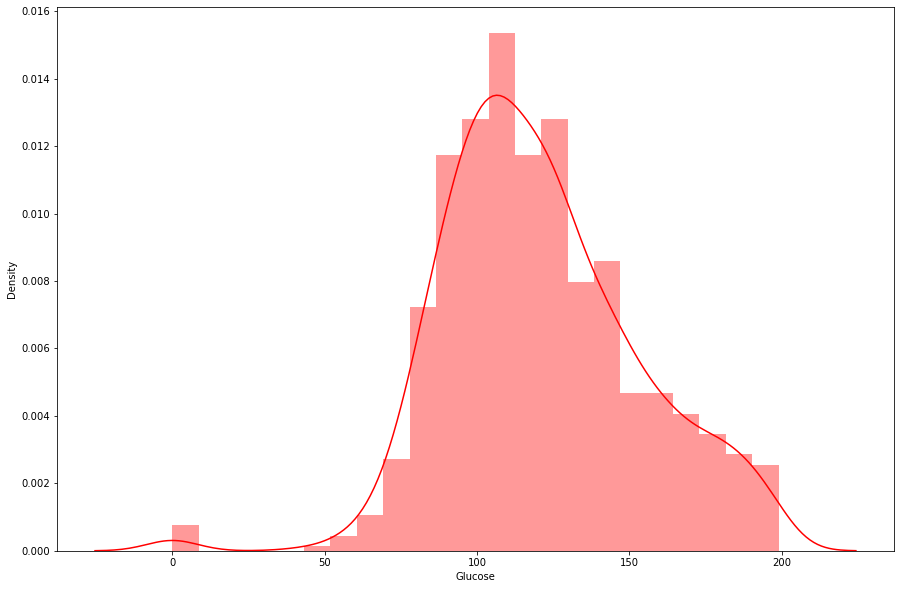

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(df['Glucose'],color='red');

print("Glucose(Mean):", df['Glucose'].mean())
print("DataType of Glucose:", df['Glucose'].dtypes)

In [12]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean()) #as our variable is numeric, plus after visualization we can observe the distribution 

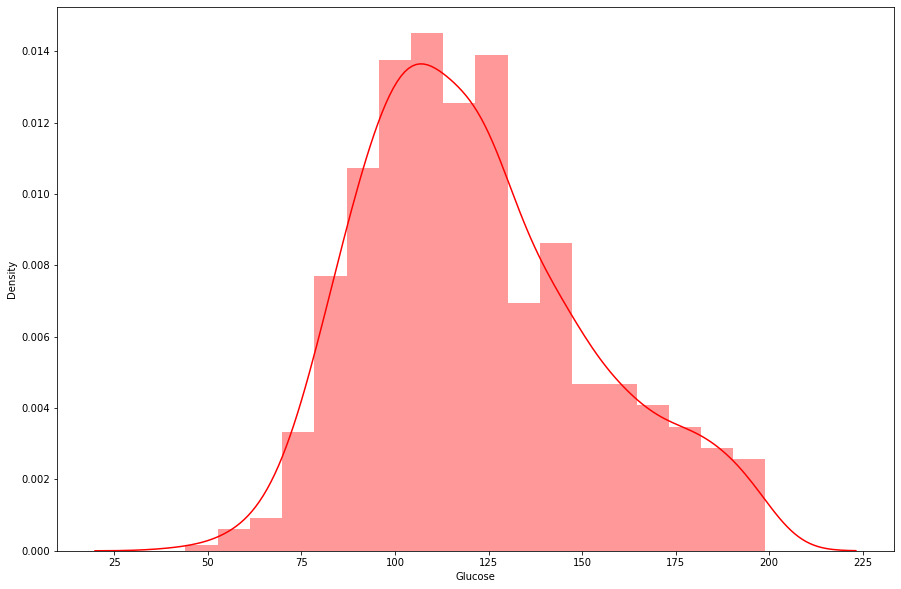

In [13]:
plt.figure(figsize=(15,10))
sns.distplot(df['Glucose'],color='red');

BloodPressure(Mean): 69.10546875
DataType of BloodPressure: int64


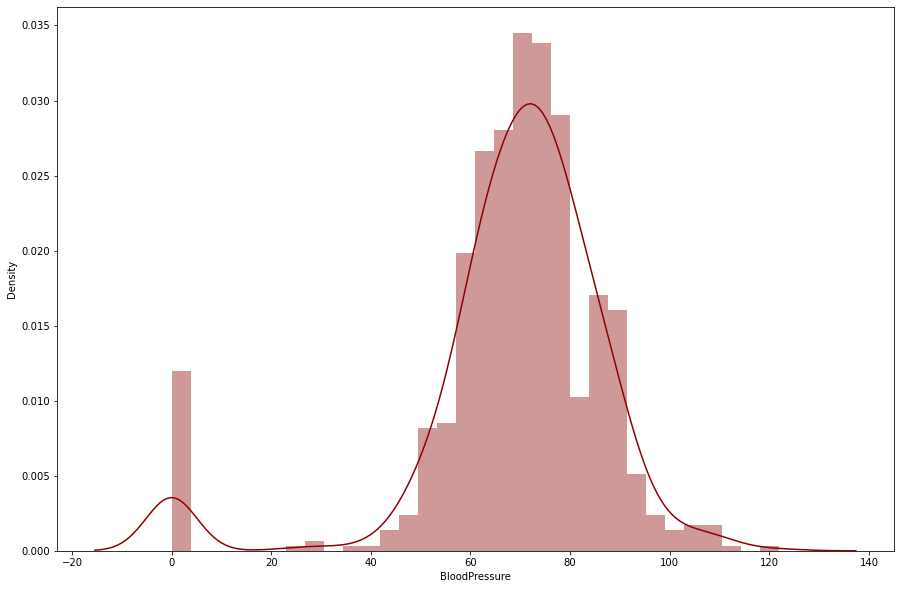

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(df['BloodPressure'],color='darkred');

print("BloodPressure(Mean):", df['BloodPressure'].mean())
print("DataType of BloodPressure:", df['BloodPressure'].dtypes)

In [15]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean()) #as our variable is numeric, plus after visualization we can observe the distribution 

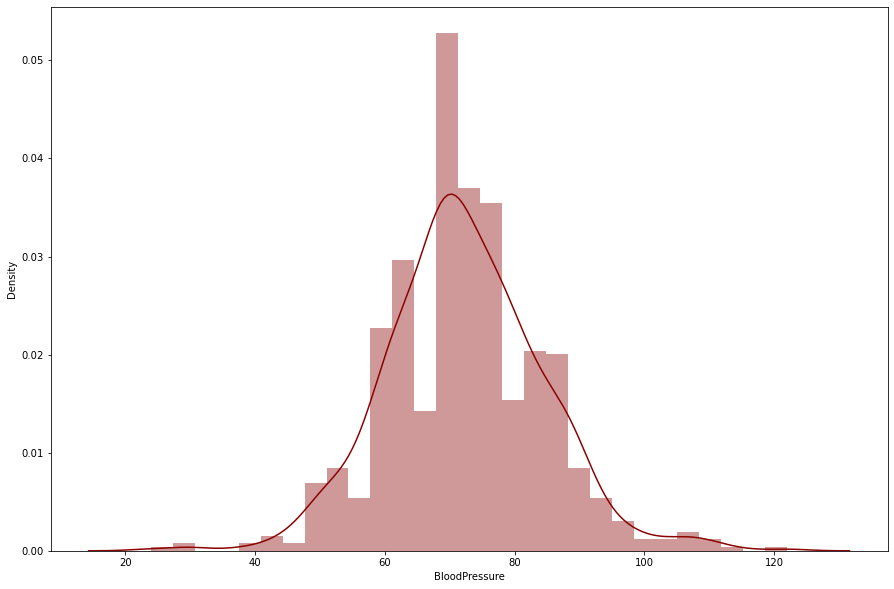

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(df['BloodPressure'],color='darkred');

SkinThickness(Mean): 20.536458333333332
DataType of SkinThickness: int64


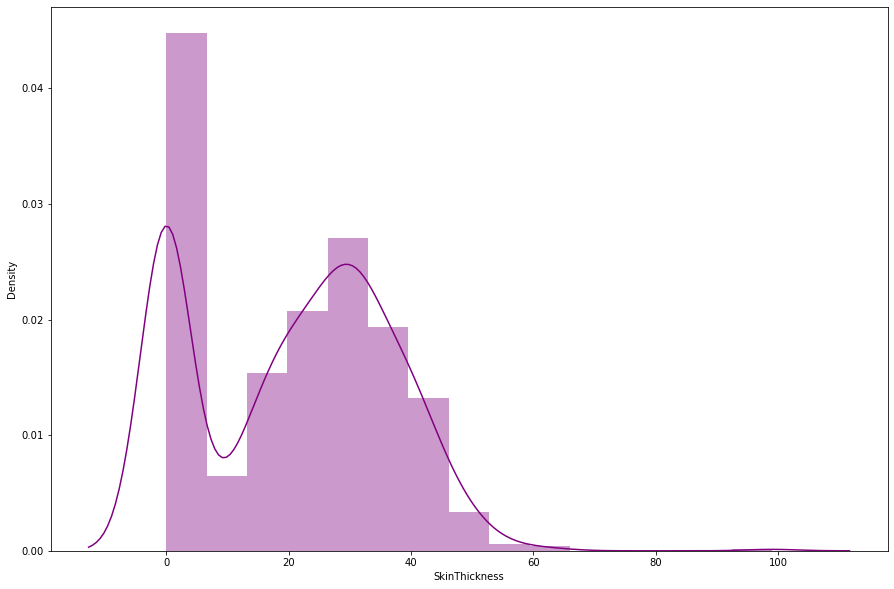

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(df['SkinThickness'],color='purple');

print("SkinThickness(Mean):", df['SkinThickness'].mean())
print("DataType of SkinThickness:", df['SkinThickness'].dtypes)

In [18]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean()) #as our variable is numeric, plus after visualization we can observe the distribution

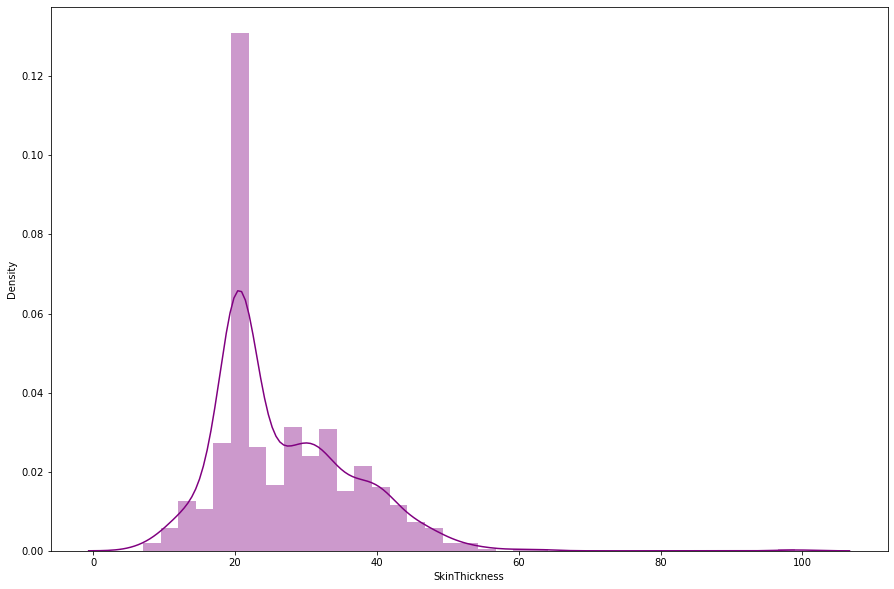

In [19]:
plt.figure(figsize=(15,10))
sns.distplot(df['SkinThickness'],color='purple');

Insulin(Mean): 79.79947916666667
DataType of Insulin: int64


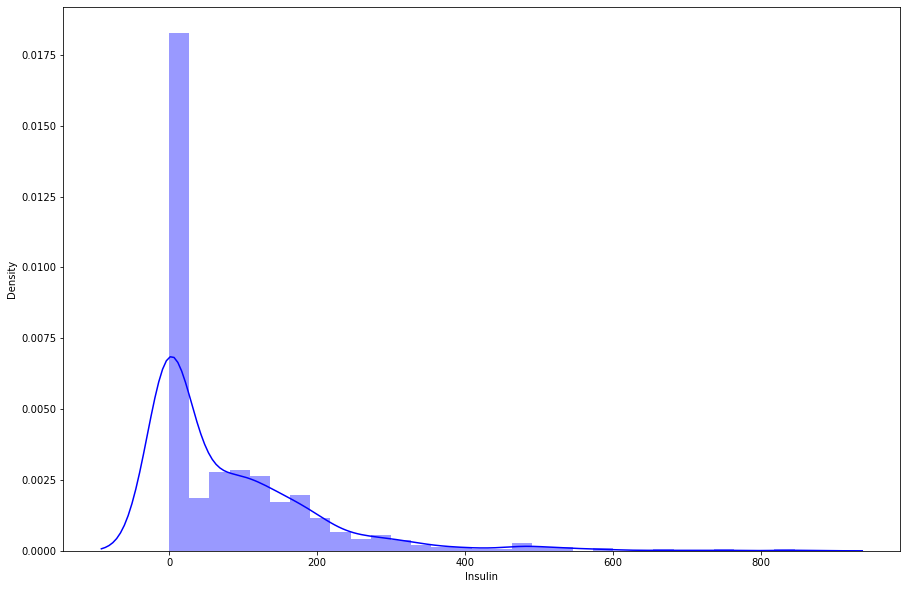

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(df['Insulin'],color='blue');

print("Insulin(Mean):", df['Insulin'].mean())
print("DataType of Insulin:", df['Insulin'].dtypes)

In [21]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

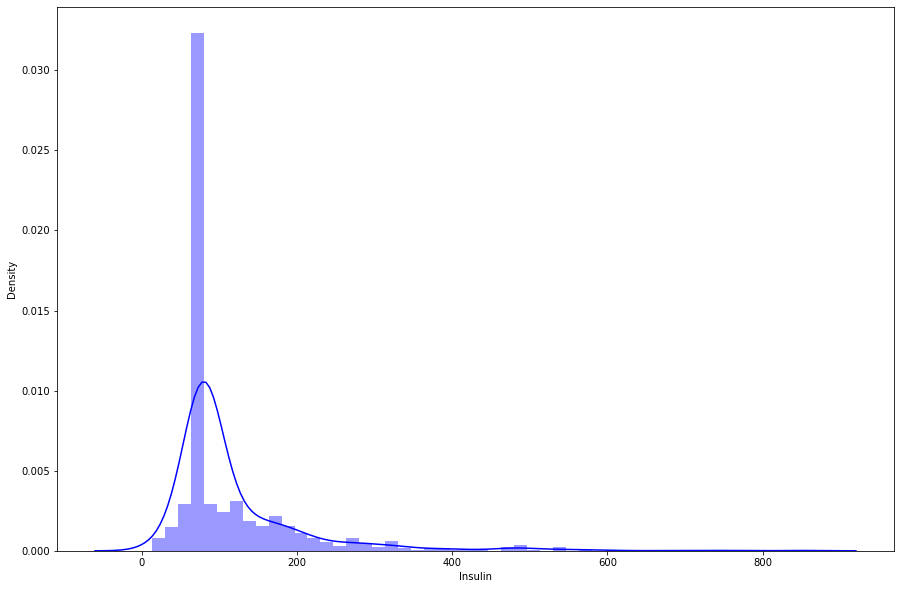

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(df['Insulin'],color='blue');

BMI(Mean): 31.992578124999977
DataType of BMI: float64


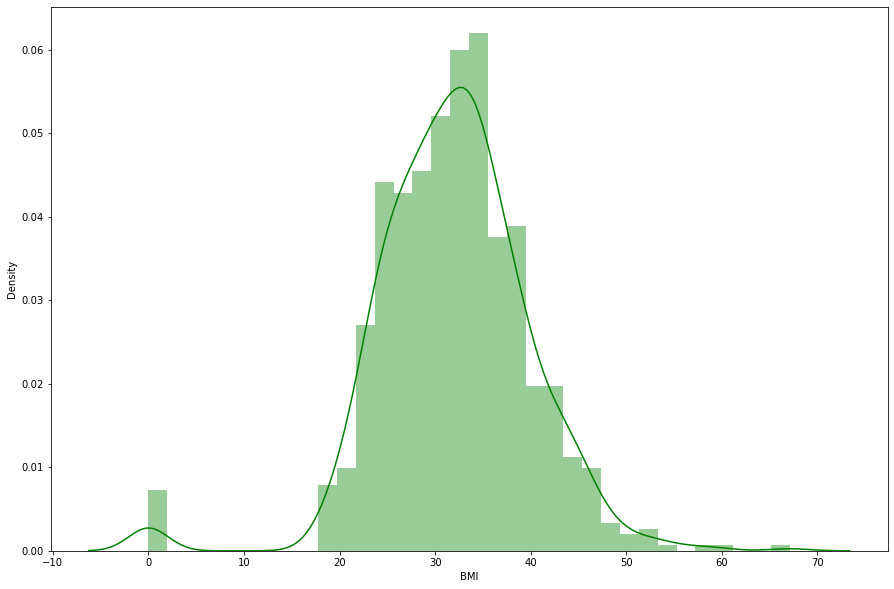

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(df['BMI'],color='green');


print("BMI(Mean):", df['BMI'].mean())
print("DataType of BMI:", df['BMI'].dtypes)

In [24]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

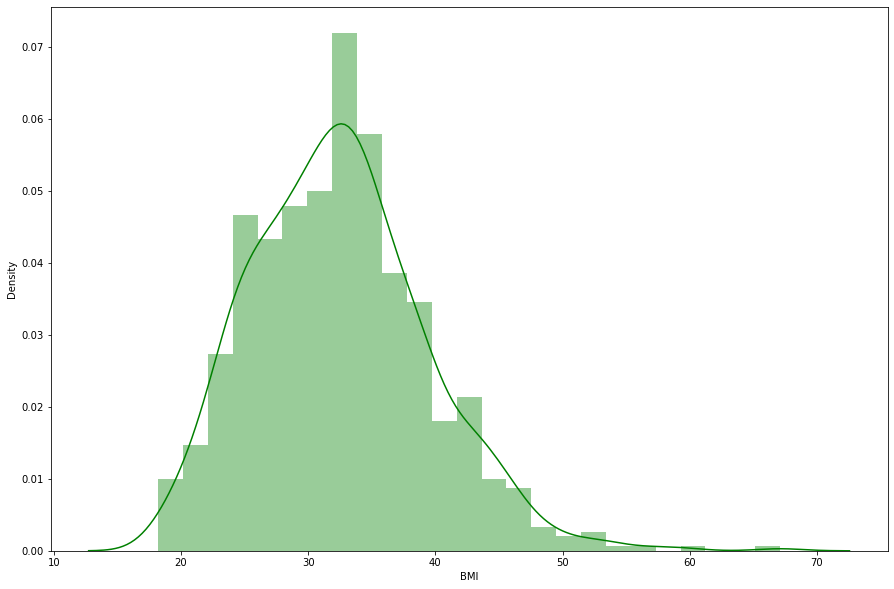

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(df['BMI'],color='green');

In [26]:
df.isin([0]).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [27]:
df.sample(7)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
727            0    141.0           84.0           26.0   79.799479  32.4   
133            8     84.0           74.0           31.0   79.799479  38.3   
500            2    117.0           90.0           19.0   71.000000  25.2   
331            2     87.0           58.0           16.0   52.000000  32.7   
756            7    137.0           90.0           41.0   79.799479  32.0   
716            3    173.0           78.0           39.0  185.000000  33.8   
477            7    114.0           76.0           17.0  110.000000  23.8   

     DiabetesPedigreeFunction  Age  Outcome  
727                     0.433   22        0  
133                     0.457   39        0  
500                     0.313   21        0  
331                     0.166   25        0  
756                     0.391   39        0  
716                     0.970   31        1  
477                     0.466   31        0

#### Data Exploration:

- Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

- Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

- Perform correlation analysis. Visually explore it using a heat map.

0    500
1    268
Name: Outcome, dtype: int64


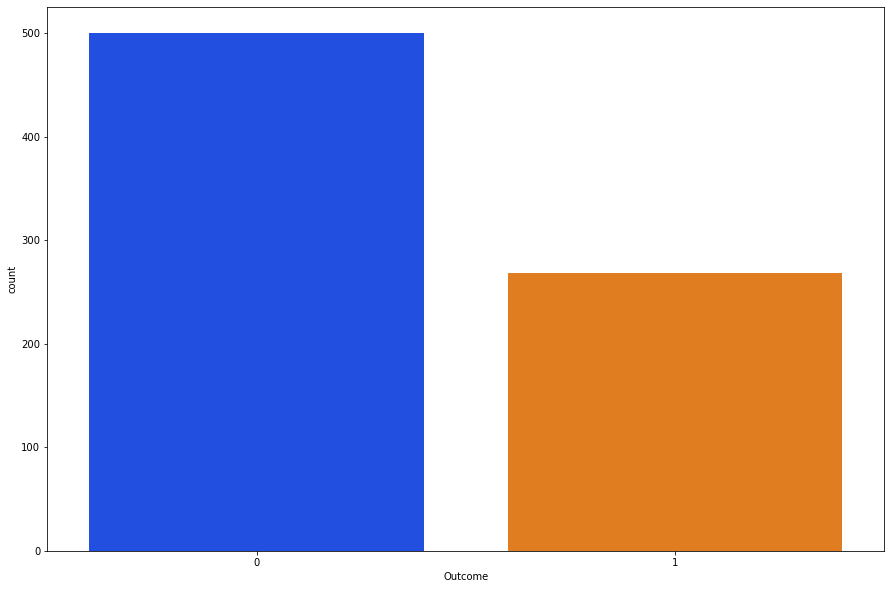

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Outcome'],data=df,palette='bright')
print(df['Outcome'].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


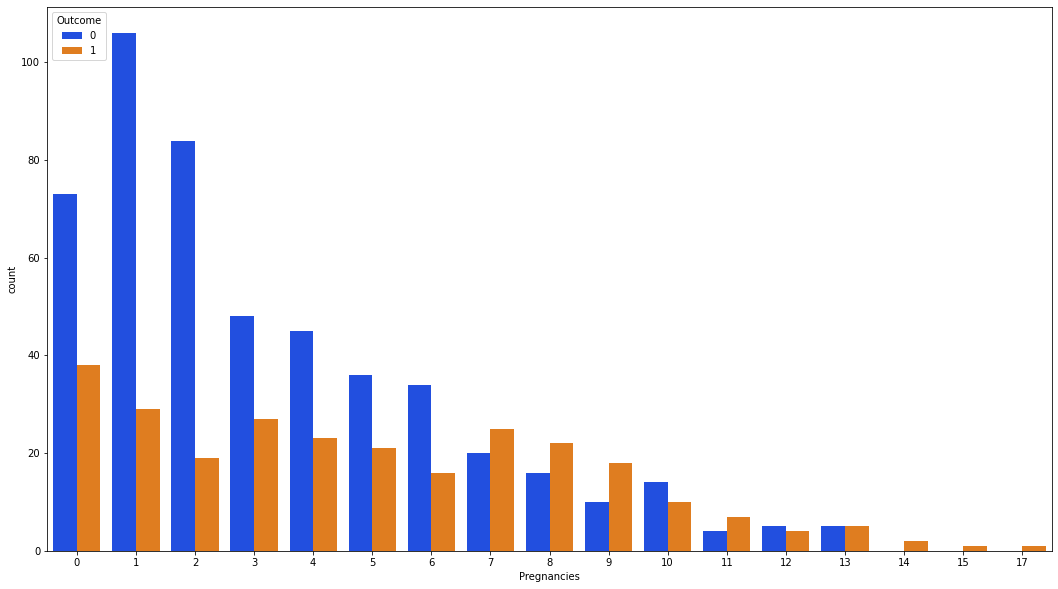

In [29]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=df,hue = 'Outcome', palette='bright');
print(df['Pregnancies'].value_counts())

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64


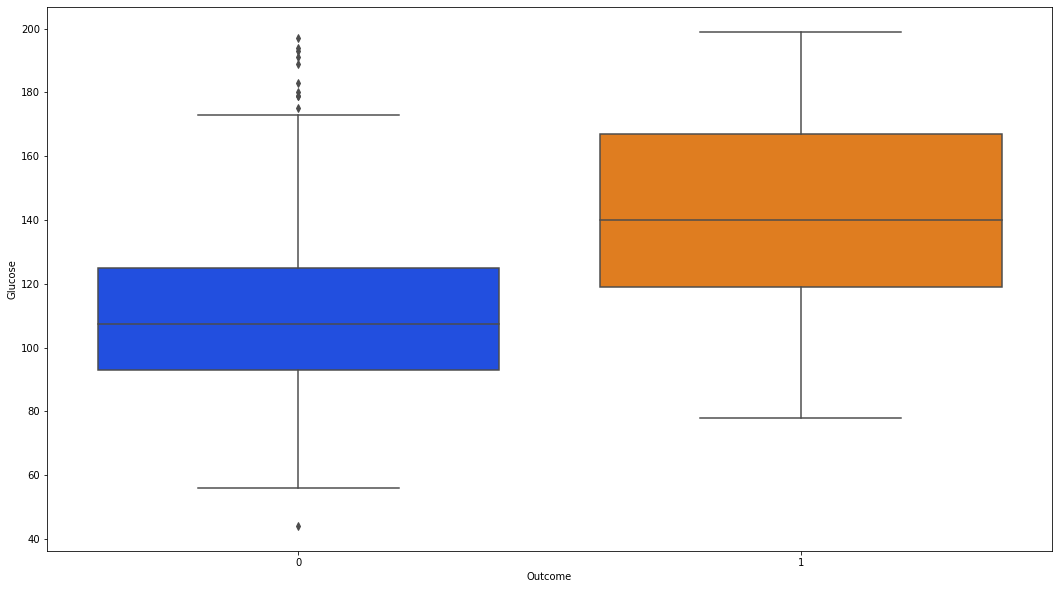

In [30]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Glucose',data=df,x = 'Outcome', palette='bright');
print(df['Glucose'].value_counts())

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: BloodPressure, dtype: int64


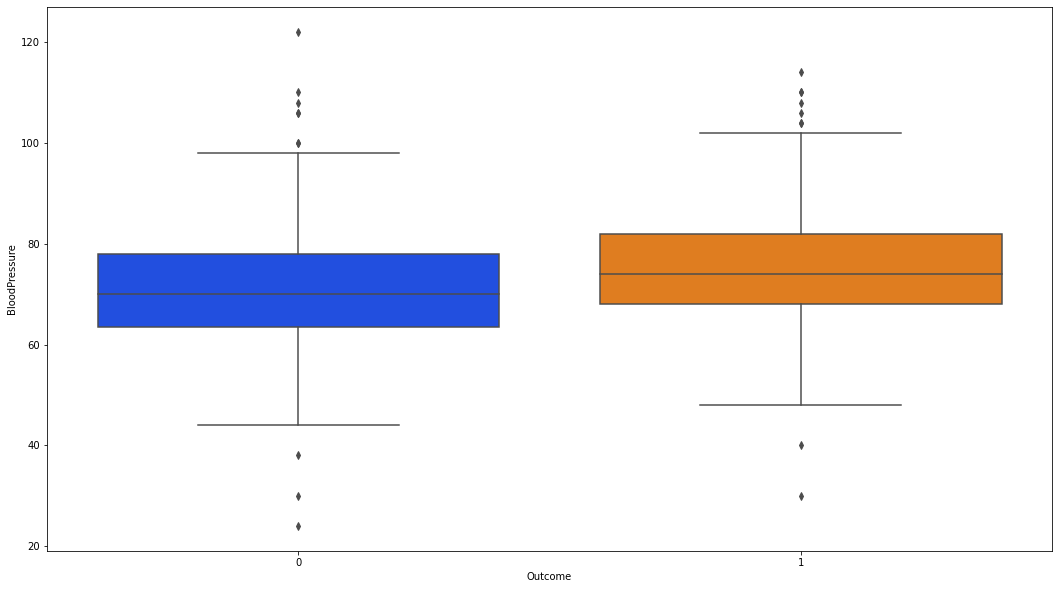

In [31]:
plt.figure(figsize=(18,10))
sns.boxplot(y='BloodPressure',data=df,x = 'Outcome', palette='bright');
print(df['BloodPressure'].value_counts())

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
28.000000     20
18.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
25.000000     16
26.000000     16
22.000000     16
37.000000     16
41.000000     15
35.000000     15
36.000000     14
15.000000     14
17.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
46.000000      8
34.000000      8
12.000000      7
38.000000      7
11.000000      6
43.000000      6
16.000000      6
45.000000      6
14.000000      6
44.000000      5
10.000000      5
48.000000      4
47.000000      4
49.000000      3
50.000000      3
8.000000       2
7.000000       2
52.000000      2
54.000000      2
63.000000      1
60.000000      1
56.000000      1
51.000000      1
99.000000      1
Name: SkinThickness, dtype: int64


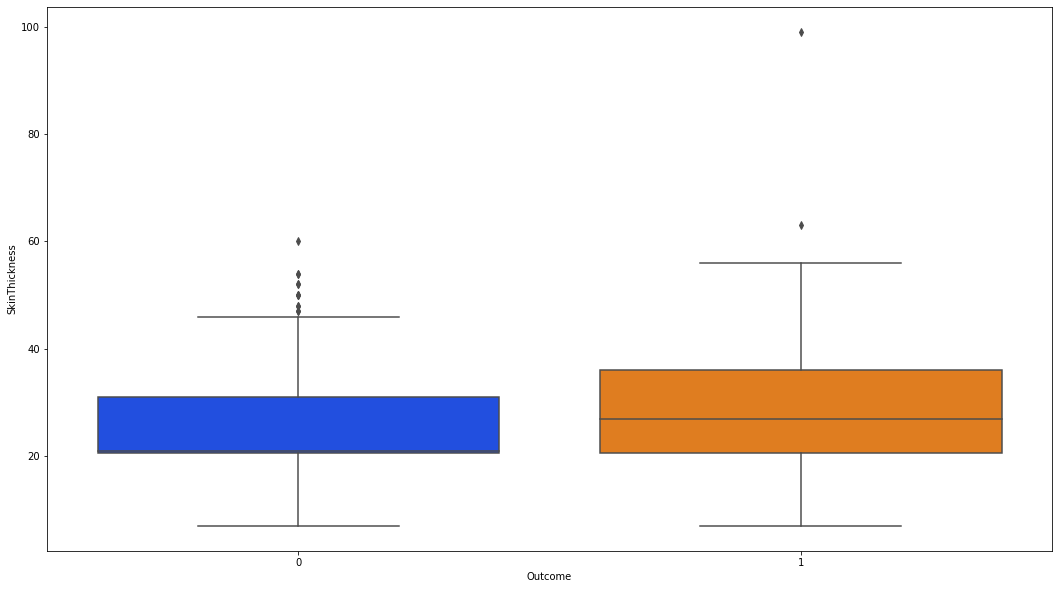

In [32]:
plt.figure(figsize=(18,10))
sns.boxplot(y='SkinThickness',data=df,x = 'Outcome', palette='bright');
print(df['SkinThickness'].value_counts())

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
73.000000       1
171.000000      1
255.000000      1
52.000000       1
112.000000      1
Name: Insulin, Length: 186, dtype: int64


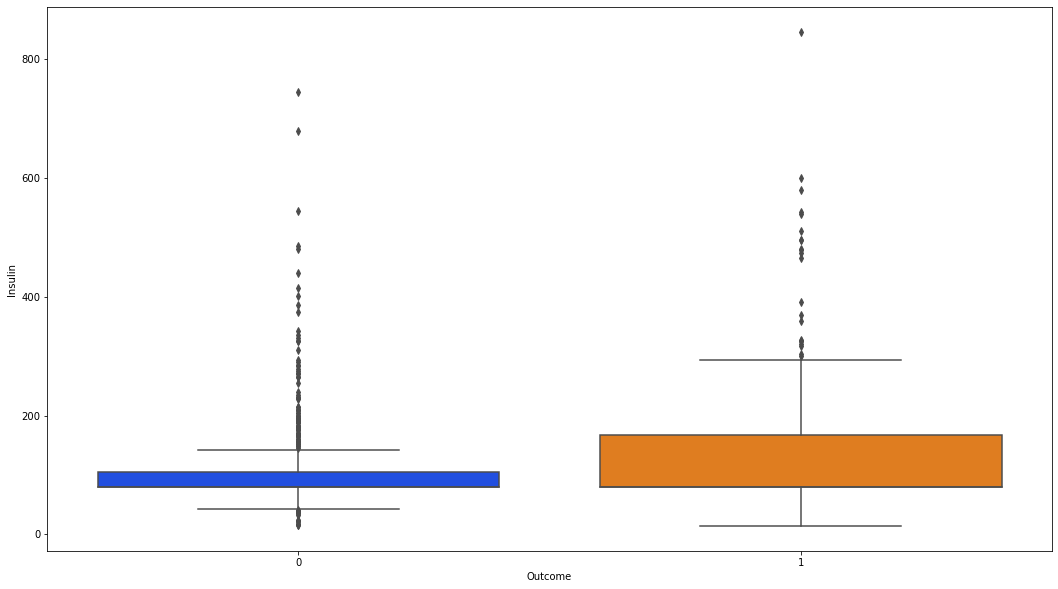

In [33]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Insulin',data=df,x = 'Outcome', palette='bright');
print(df['Insulin'].value_counts())

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64


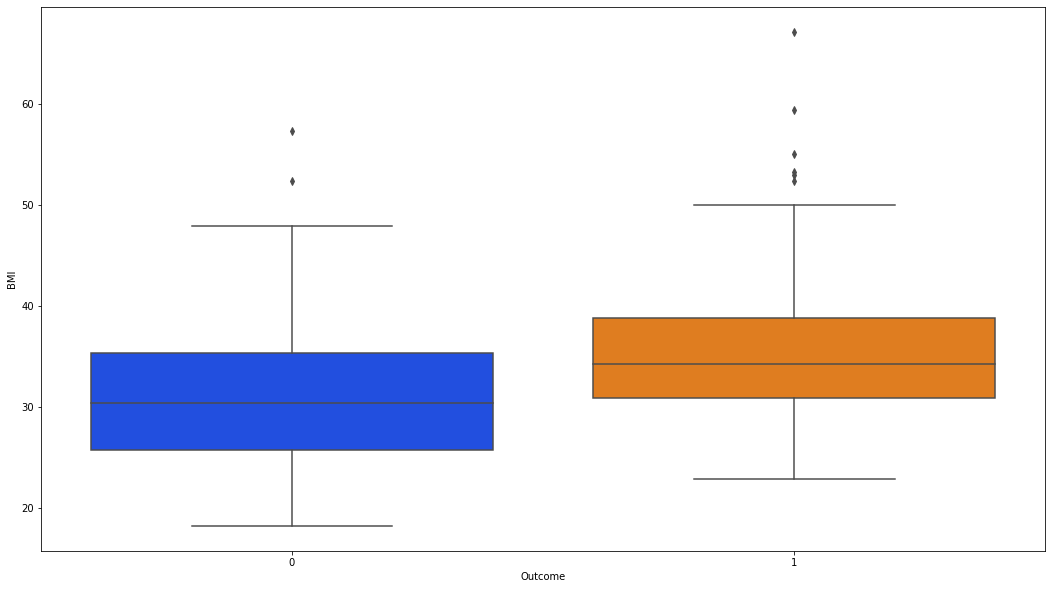

In [34]:
plt.figure(figsize=(18,10))
sns.boxplot(y='BMI',data=df,x = 'Outcome', palette='bright');
print(df['BMI'].value_counts())

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


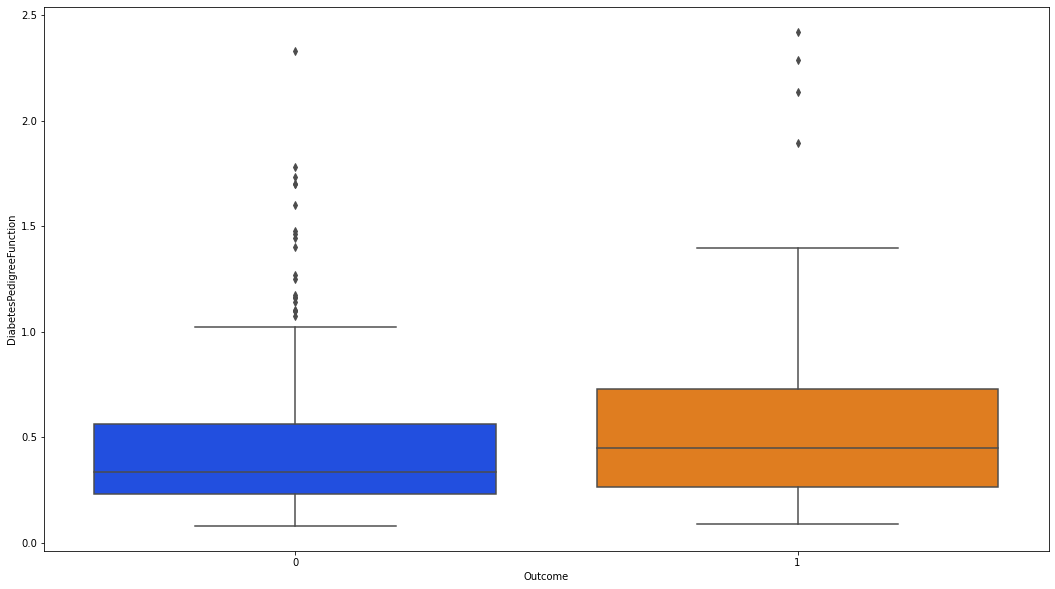

In [35]:
plt.figure(figsize=(18,10))
sns.boxplot(y='DiabetesPedigreeFunction',data=df,x = 'Outcome', palette='bright');
print(df['DiabetesPedigreeFunction'].value_counts())

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


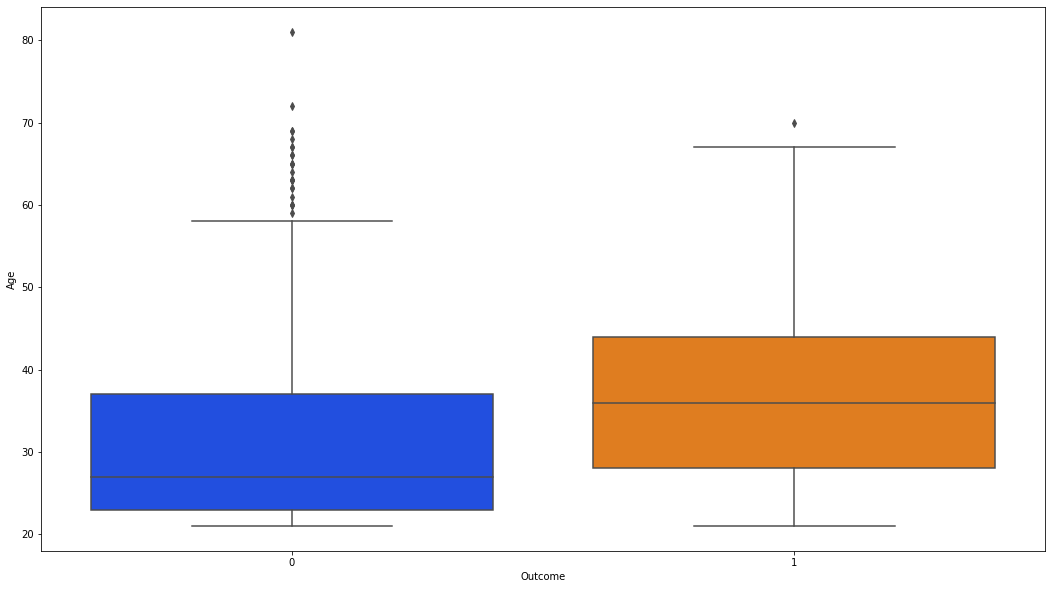

In [36]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Age',data=df,x = 'Outcome', palette='bright');
print(df['Age'].value_counts())

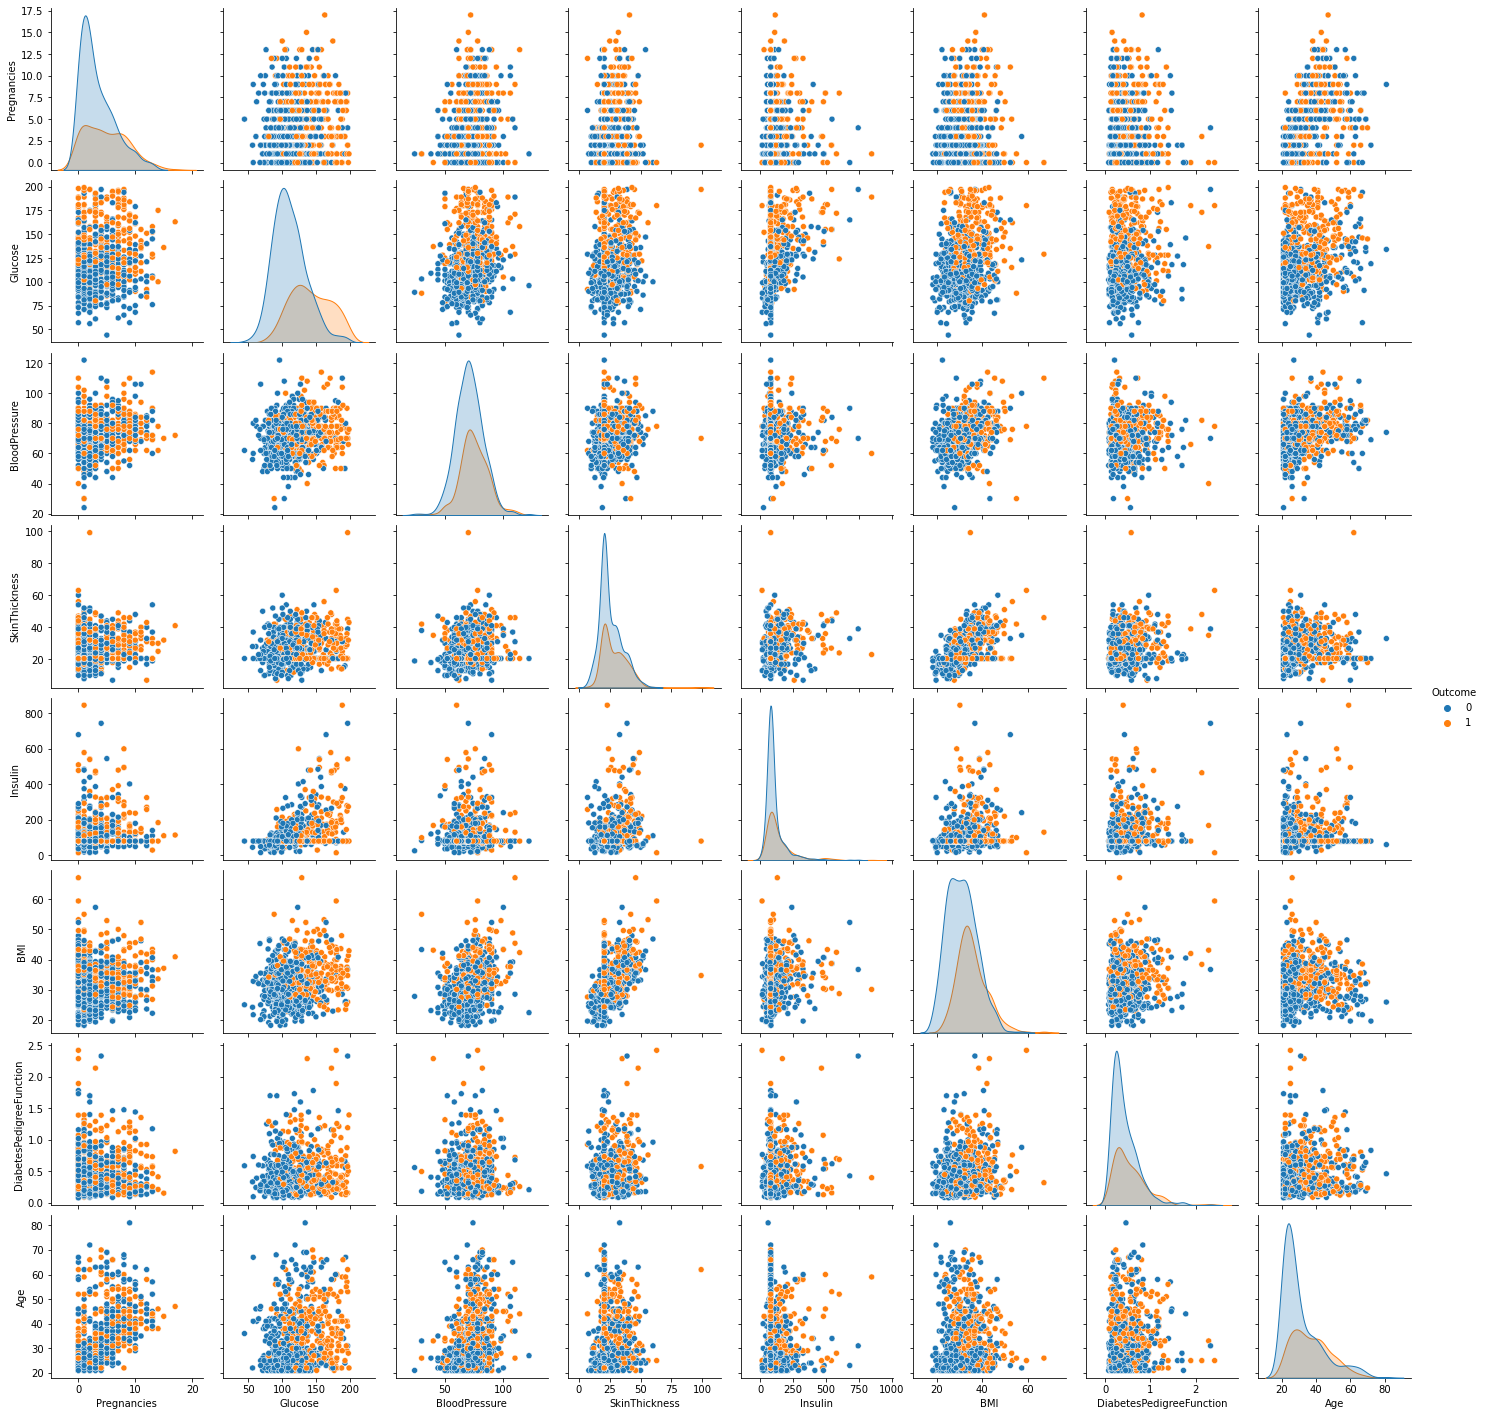

In [37]:
sns.pairplot(df,hue='Outcome');

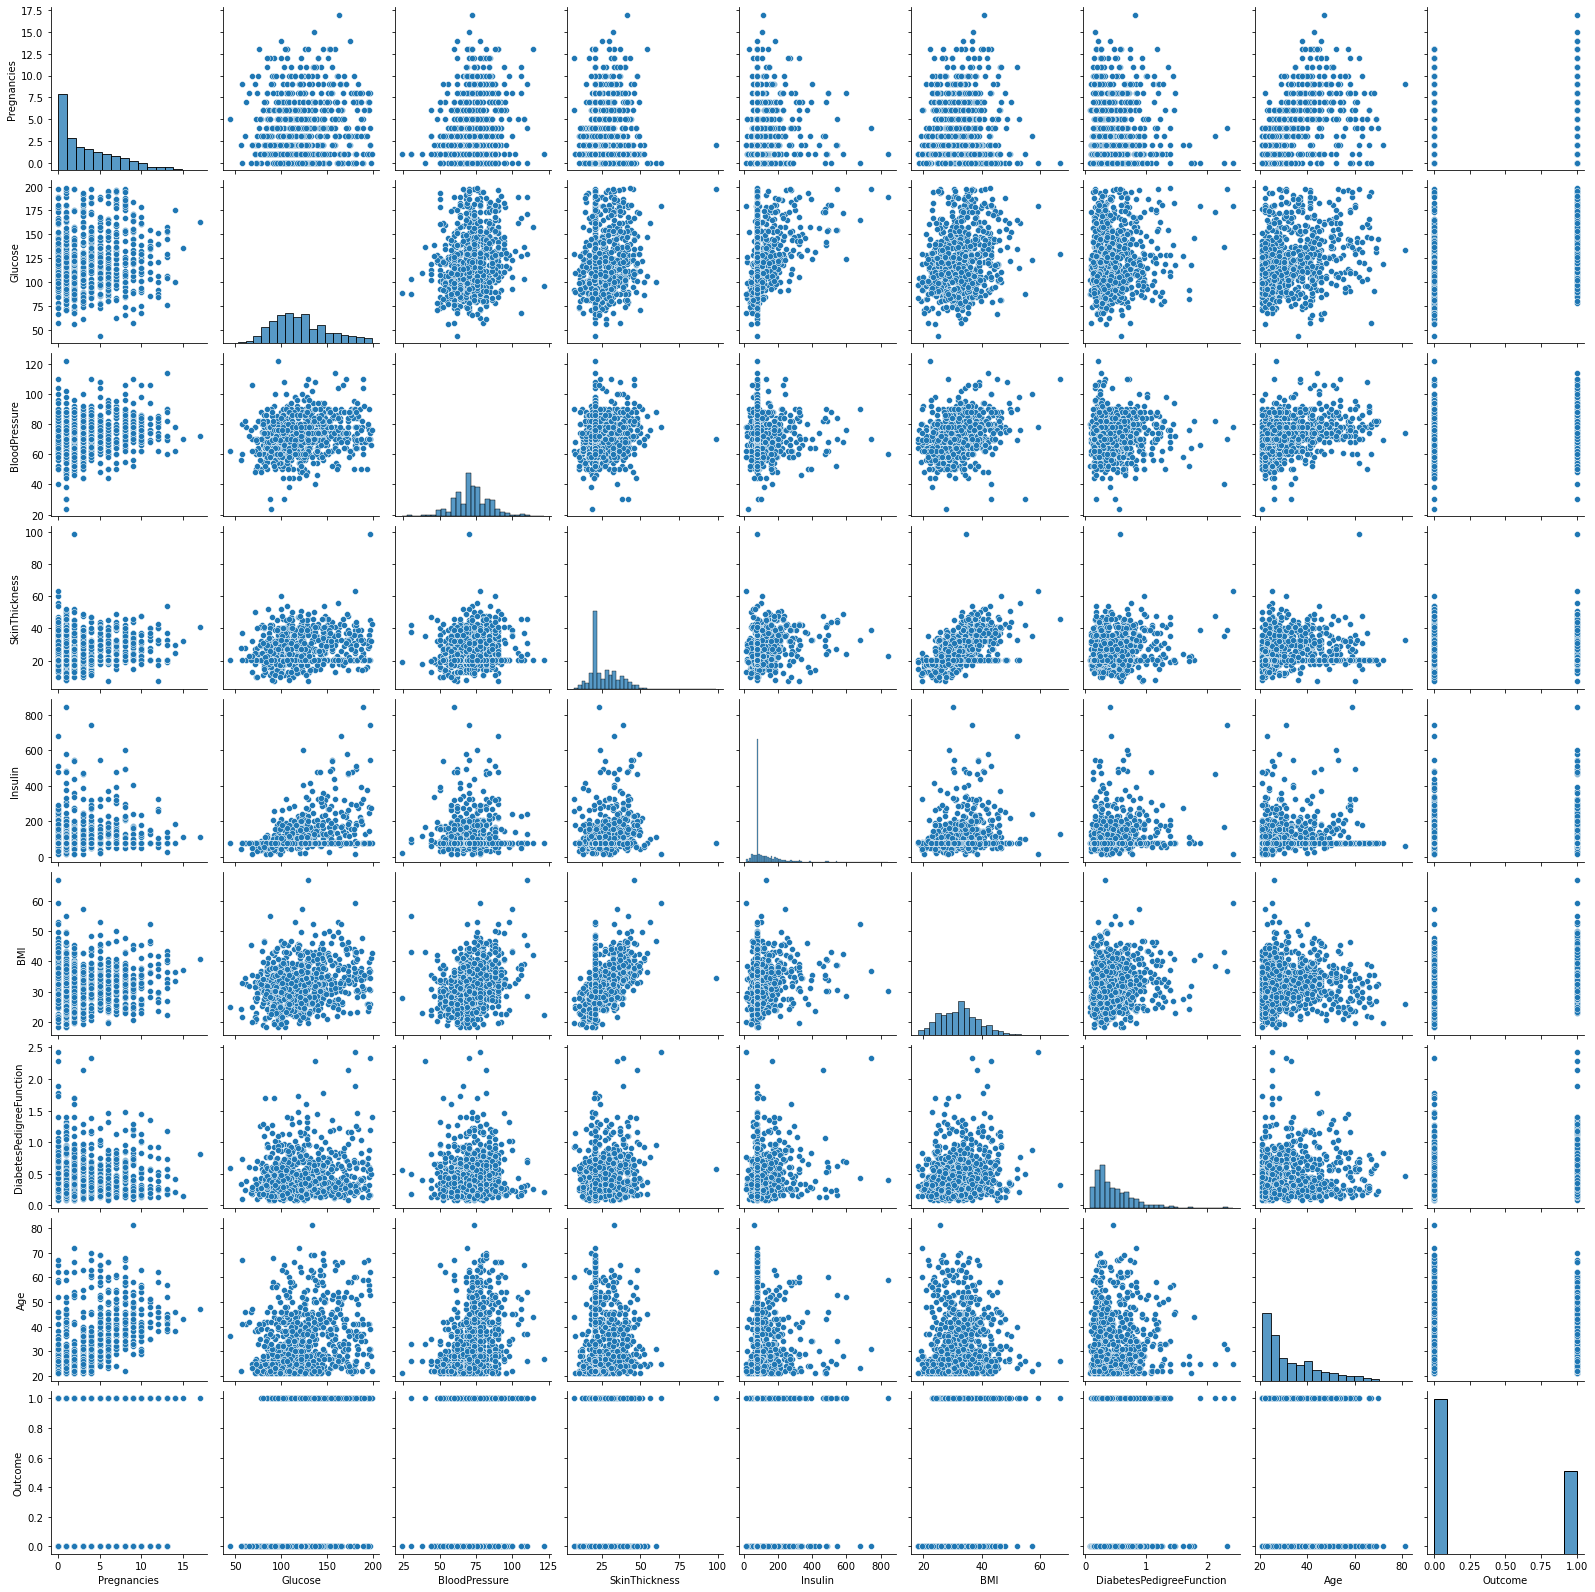

In [38]:
sns.pairplot(df);

In [39]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231478                  0.137106   
BloodPressure             0.010926  0.281231                  0.000371   
SkinThickness             0.240361  0.535703                  0.154961   
Insulin                   1.000000  0.189856                  0.157806   
BMI                       0.189856  1.000000                  0.153508   
DiabetesPedigreeFunction  0.157806  0.153508                  1.000000   
Age                       0.038652  0.025748                  0.033561   
Outcome                   0.179185  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                   0.038652  0.179185  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

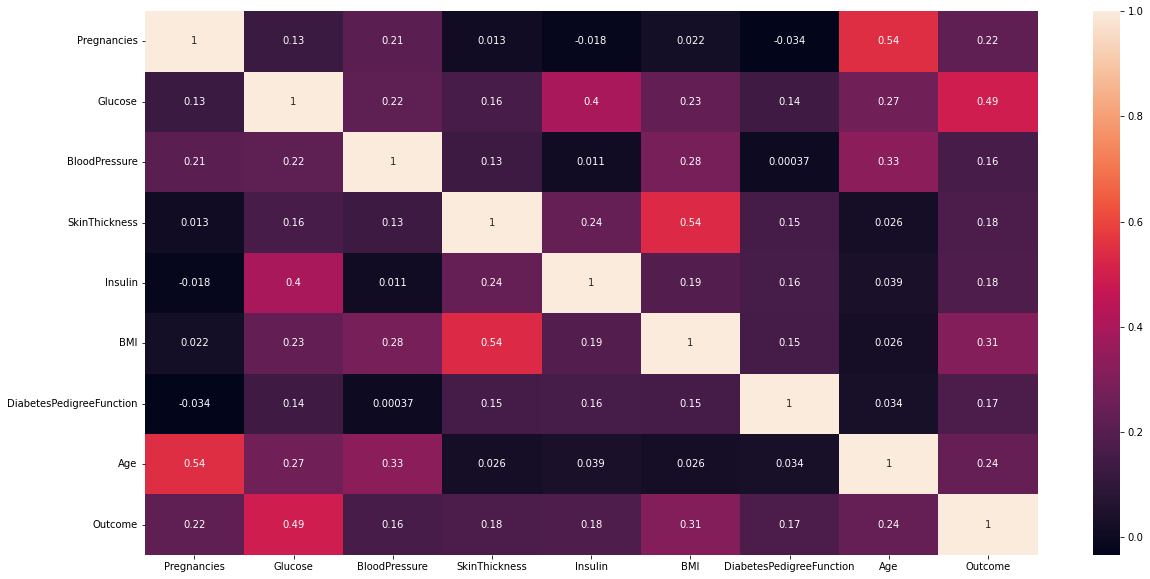

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

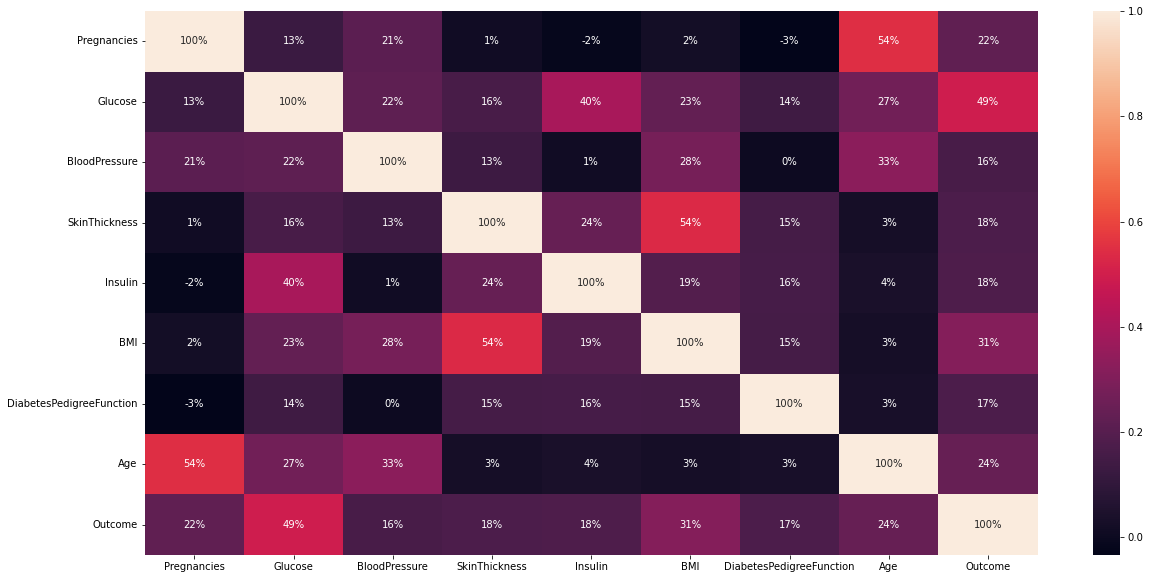

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, fmt='.0%')
plt.show()

- we can observe that Glucose(49%) and BMI(31%) has good impact on 'Outcome'.

- There is a strong positive correlation between:
                      - BMI & SkinThickness (54%),
                      
                      - Age & Pregnancies (54%)
  

#### Project Task: Week 2

Data Modeling:

- Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

- Apply an appropriate classification algorithm to build a model.

- Compare various models with the results from KNN algorithm.

- Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

- Please be descriptive to explain what values of these parameter you have used.

In [42]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [43]:
pd.crosstab(df['Outcome'], df['Pregnancies'],normalize=True)

Pregnancies        0         1         2         3         4         5   \
Outcome                                                                   
0            0.095052  0.138021  0.109375  0.062500  0.058594  0.046875   
1            0.049479  0.037760  0.024740  0.035156  0.029948  0.027344   

Pregnancies        6         7         8         9         10        11  \
Outcome                                                                   
0            0.044271  0.026042  0.020833  0.013021  0.018229  0.005208   
1            0.020833  0.032552  0.028646  0.023438  0.013021  0.009115   

Pregnancies        12       13        14        15        17  
Outcome                                                       
0            0.006510  0.00651  0.000000  0.000000  0.000000  
1            0.005208  0.00651  0.002604  0.001302  0.001302

In [44]:
pd.crosstab(df['Outcome'], df['Glucose'],normalize=True)

Glucose     44.0      56.0      57.0      61.0      62.0      65.0      67.0   \
Outcome                                                                         
0        0.001302  0.001302  0.002604  0.001302  0.001302  0.001302  0.001302   
1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Glucose     68.0      71.0      72.0   ...     189.0     190.0     191.0  \
Outcome                                ...                                 
0        0.003906  0.005208  0.001302  ...  0.001302  0.000000  0.001302   
1        0.000000  0.000000  0.000000  ...  0.003906  0.001302  0.000000   

Glucose     193.0     194.0     195.0     196.0     197.0     198.0     199.0  
Outcome                                                                        
0        0.001302  0.001302  0.000000  0.000000  0.001302  0.000000  0.000000  
1        0.001302  0.002604  0.002604  0.003906  0.003906  0.001302  0.001302  

[2 rows x 136 columns]

In [45]:
pd.crosstab(df['Outcome'], df['BloodPressure'],normalize=True)

BloodPressure     24.0      30.0      38.0      40.0      44.0      46.0   \
Outcome                                                                     
0              0.001302  0.001302  0.001302  0.000000  0.005208  0.002604   
1              0.000000  0.001302  0.000000  0.001302  0.000000  0.000000   

BloodPressure     48.0      50.0      52.0      54.0   ...     96.0   \
Outcome                                                ...             
0              0.005208  0.010417  0.010417  0.011719  ...  0.003906   
1              0.001302  0.006510  0.003906  0.002604  ...  0.001302   

BloodPressure     98.0      100.0     102.0     104.0     106.0     108.0  \
Outcome                                                                     
0              0.001302  0.002604  0.000000  0.000000  0.002604  0.001302   
1              0.002604  0.001302  0.001302  0.002604  0.001302  0.001302   

BloodPressure     110.0     114.0     122.0  
Outcome                                      
0              0.001302  0.000000  0.001302  
1              0.002604  0.001302  0.000000  

[2 rows x 47 columns]

In [46]:
pd.crosstab(df['Outcome'], df['SkinThickness'],normalize=True)

SkinThickness      7.0       8.0      10.0      11.0      12.0      13.0  \
Outcome                                                                    
0              0.001302  0.002604  0.00651  0.007812  0.007812  0.013021   
1              0.001302  0.000000  0.00000  0.000000  0.001302  0.001302   

SkinThickness      14.0      15.0      16.0      17.0  ...      48.0  \
Outcome                                                ...             
0              0.005208  0.016927  0.007812  0.015625  ...  0.002604   
1              0.002604  0.001302  0.000000  0.002604  ...  0.002604   

SkinThickness      49.0      50.0      51.0      52.0      54.0      56.0  \
Outcome                                                                     
0              0.000000  0.003906  0.000000  0.002604  0.002604  0.000000   
1              0.003906  0.000000  0.001302  0.000000  0.000000  0.001302   

SkinThickness      60.0      63.0      99.0  
Outcome                                      
0              0.001302  0.000000  0.000000  
1              0.000000  0.001302  0.001302  

[2 rows x 51 columns]

In [47]:
pd.crosstab(df['Outcome'], df['Insulin'],normalize=True)

Insulin     14.0      15.0      16.0      18.0      22.0      23.0      25.0   \
Outcome                                                                         
0        0.000000  0.001302  0.001302  0.002604  0.001302  0.002604  0.001302   
1        0.001302  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Insulin     29.0      32.0      36.0   ...     495.0     510.0     540.0  \
Outcome                                ...                                 
0        0.000000  0.001302  0.002604  ...  0.000000  0.000000  0.000000   
1        0.001302  0.000000  0.001302  ...  0.002604  0.001302  0.001302   

Insulin     543.0     545.0     579.0     600.0     680.0     744.0     846.0  
Outcome                                                                        
0        0.000000  0.001302  0.000000  0.000000  0.001302  0.001302  0.000000  
1        0.001302  0.000000  0.001302  0.001302  0.000000  0.000000  0.001302  

[2 rows x 186 columns]

In [48]:
pd.crosstab(df['Outcome'], df['BMI'],normalize=True)

BMI          18.2      18.4      19.1      19.3      19.4      19.5      19.6  \
Outcome                                                                         
0        0.003906  0.001302  0.001302  0.001302  0.001302  0.002604  0.003906   
1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

BMI          19.9      20.0      20.1  ...      49.6      49.7      50.0  \
Outcome                                ...                                 
0        0.001302  0.001302  0.001302  ...  0.000000  0.000000  0.000000   
1        0.000000  0.000000  0.000000  ...  0.001302  0.001302  0.001302   

BMI          52.3      52.9      53.2      55.0      57.3      59.4      67.1  
Outcome                                                                        
0        0.001302  0.000000  0.000000  0.000000  0.001302  0.000000  0.000000  
1        0.001302  0.001302  0.001302  0.001302  0.000000  0.001302  0.001302  

[2 rows x 248 columns]

In [49]:
pd.crosstab(df['Outcome'], df['DiabetesPedigreeFunction'],normalize=True)

DiabetesPedigreeFunction     0.078     0.084     0.085     0.088     0.089  \
Outcome                                                                      
0                         0.001302  0.001302  0.002604  0.001302  0.001302   
1                         0.000000  0.000000  0.000000  0.001302  0.000000   

DiabetesPedigreeFunction     0.092     0.096     0.100     0.101     0.102  \
Outcome                                                                      
0                         0.001302  0.001302  0.001302  0.001302  0.001302   
1                         0.000000  0.000000  0.000000  0.000000  0.000000   

DiabetesPedigreeFunction  ...     1.600     1.698     1.699     1.731  \
Outcome                   ...                                           
0                         ...  0.001302  0.001302  0.001302  0.001302   
1                         ...  0.000000  0.000000  0.000000  0.000000   

DiabetesPedigreeFunction     1.781     1.893     2.137     2.288     2.329  \
Outcome                                                                      
0                         0.001302  0.000000  0.000000  0.000000  0.001302   
1                         0.000000  0.001302  0.001302  0.001302  0.000000   

DiabetesPedigreeFunction     2.420  
Outcome                             
0                         0.000000  
1                         0.001302  

[2 rows x 517 columns]

In [50]:
pd.crosstab(df['Outcome'], df['Age'],normalize=True)

Age            21        22        23        24        25        26        27  \
Outcome                                                                         
0        0.075521  0.079427  0.040365  0.049479  0.044271  0.032552  0.031250   
1        0.006510  0.014323  0.009115  0.010417  0.018229  0.010417  0.010417   

Age            28        29        30  ...        63        64        65  \
Outcome                                ...                                 
0        0.032552  0.020833  0.019531  ...  0.005208  0.001302  0.003906   
1        0.013021  0.016927  0.007812  ...  0.000000  0.000000  0.000000   

Age            66        67        68        69        70        72        81  
Outcome                                                                        
0        0.002604  0.002604  0.001302  0.002604  0.000000  0.001302  0.001302  
1        0.002604  0.001302  0.000000  0.000000  0.001302  0.000000  0.000000  

[2 rows x 52 columns]

In [51]:
X = df.loc[:, df.columns != 'Outcome']  # independent variables

y = df.loc[:, df.columns == 'Outcome']  # Target variable

In [52]:
X = pd.get_dummies(X,drop_first=True)

In [53]:
y.head()  

Outcome
0        1
1        0
2        1
3        0
4        1

In [54]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

In [56]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [57]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
146            9     57.0           80.0      37.000000   79.799479  32.8   
243            6    119.0           50.0      22.000000  176.000000  27.1   
529            0    111.0           65.0      20.536458   79.799479  24.6   
472            0    119.0           66.0      27.000000   79.799479  38.8   
278            5    114.0           74.0      20.536458   79.799479  24.9   

     DiabetesPedigreeFunction  Age  
146                     0.096   41  
243                     1.318   33  
529                     0.660   31  
472                     0.259   22  
278                     0.744   57

In [58]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve



In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [60]:
model.coef_.round(2)

array([[ 0.13,  0.04, -0.01, -0.  , -0.  ,  0.11,  0.79,  0.03]])

In [61]:
model.intercept_.round(2)

array([-9.28])

In [62]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [63]:
y_pred_class[:20]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [64]:
y_pred_class[:5][:]

array([0, 0, 1, 0, 0])

In [65]:
y_pred_prob[:5,:]

array([[0.72401078, 0.27598922],
       [0.7914112 , 0.2085888 ],
       [0.31068945, 0.68931055],
       [0.67432576, 0.32567424],
       [0.79683982, 0.20316018]])

In [66]:
y_pred_prob[:5,0]

array([0.72401078, 0.7914112 , 0.31068945, 0.67432576, 0.79683982])

In [67]:
#y_pred_prob[:20,:]
(y_pred_prob[:5,0]>0.5)*1

array([1, 1, 0, 1, 1])

In [68]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

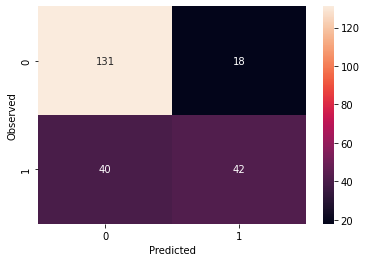

In [69]:
draw_cm(y_test,y_pred_class);

In [70]:
42/(42+40) #recall

0.5121951219512195

In [71]:
42/(42+18) #Precision

0.7

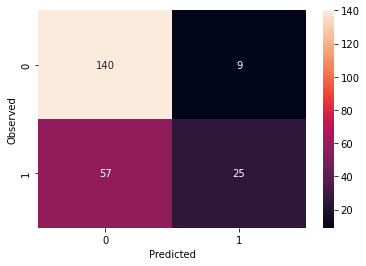

In [72]:
draw_cm(y_test,y_pred_prob[:,1]>.7);

In [73]:
25/(25+57)

0.3048780487804878

In [74]:
25/(25+9)

0.7352941176470589

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

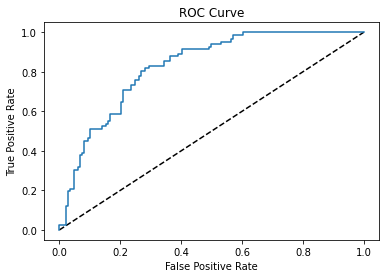

In [76]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [77]:
roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df

fpr       tpr  thresholds
0   0.000000  0.000000    1.976584
1   0.000000  0.012195    0.976584
2   0.000000  0.024390    0.973664
3   0.020134  0.024390    0.936311
4   0.020134  0.121951    0.876014
..       ...       ...         ...
63  0.570470  0.963415    0.130594
64  0.570470  0.987805    0.129004
65  0.604027  0.987805    0.113451
66  0.604027  1.000000    0.113032
67  1.000000  1.000000    0.010801

[68 rows x 3 columns]

In [78]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [80]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [81]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [82]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [83]:
df_feat.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1    -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2     1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3    -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4    -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],
                                                    test_size=0.30,random_state=101)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)

In [87]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [88]:
pred = knn.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(y_test,pred))

[[117  33]
 [ 35  46]]


In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [92]:
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Error Rate')

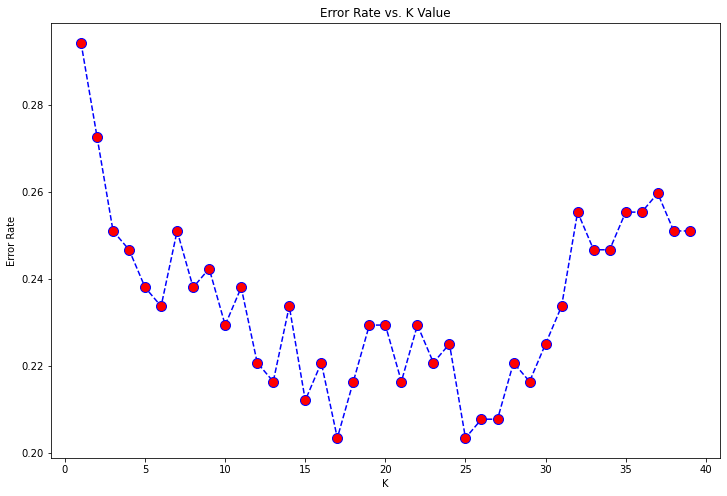

In [93]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [94]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [95]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.65367965367966 % and k = [17, 25]


In [96]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[135  15]
 [ 38  43]]


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.74      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



<AxesSubplot:>

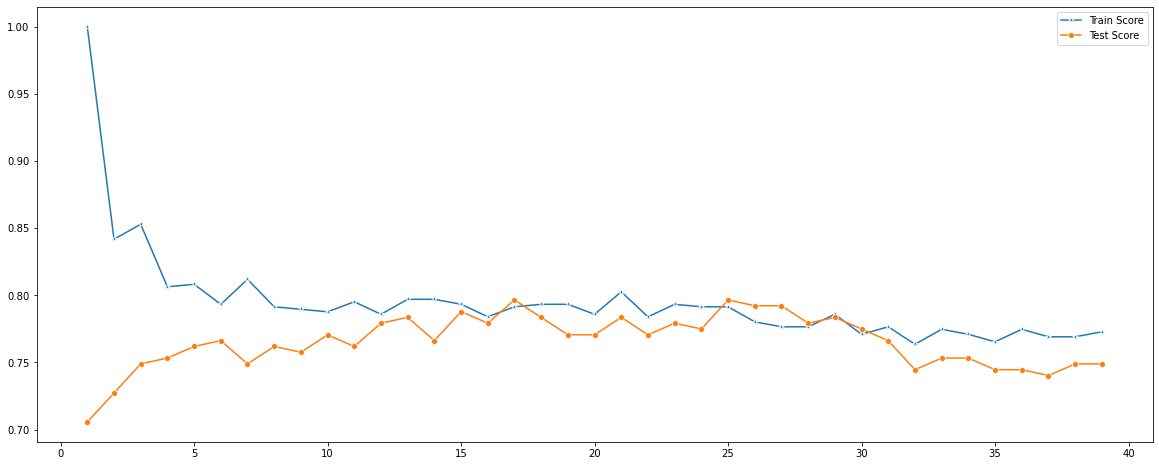

In [97]:
plt.figure(figsize=(20,8))
sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')


In [98]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7705627705627706

In [99]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix


In [100]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted    0   1  All
True                   
0          135  15  150
1           38  43   81
All        173  58  231

Text(0.5, 15.0, 'Predicted label')

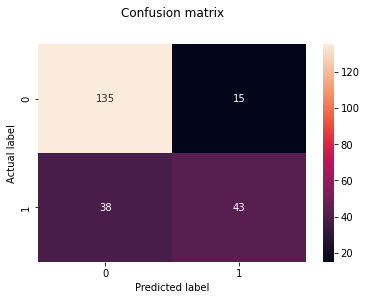

In [101]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
43/(43+15)

0.7413793103448276

In [103]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.74      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [104]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Accuracy of the model : 0.771


In [105]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

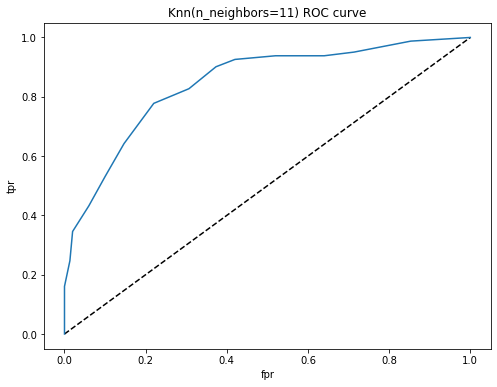

In [106]:
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [107]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8452263374485596

#### Data Reporting:

- Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

- Pie chart to describe the diabetic or non-diabetic population

- Scatter charts between relevant variables to analyze the relationships

- Histogram or frequency charts to analyze the distribution of the data

- Heatmap of correlation analysis among the relevant variables

- Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [109]:
df.to_excel('df_.xlsx')

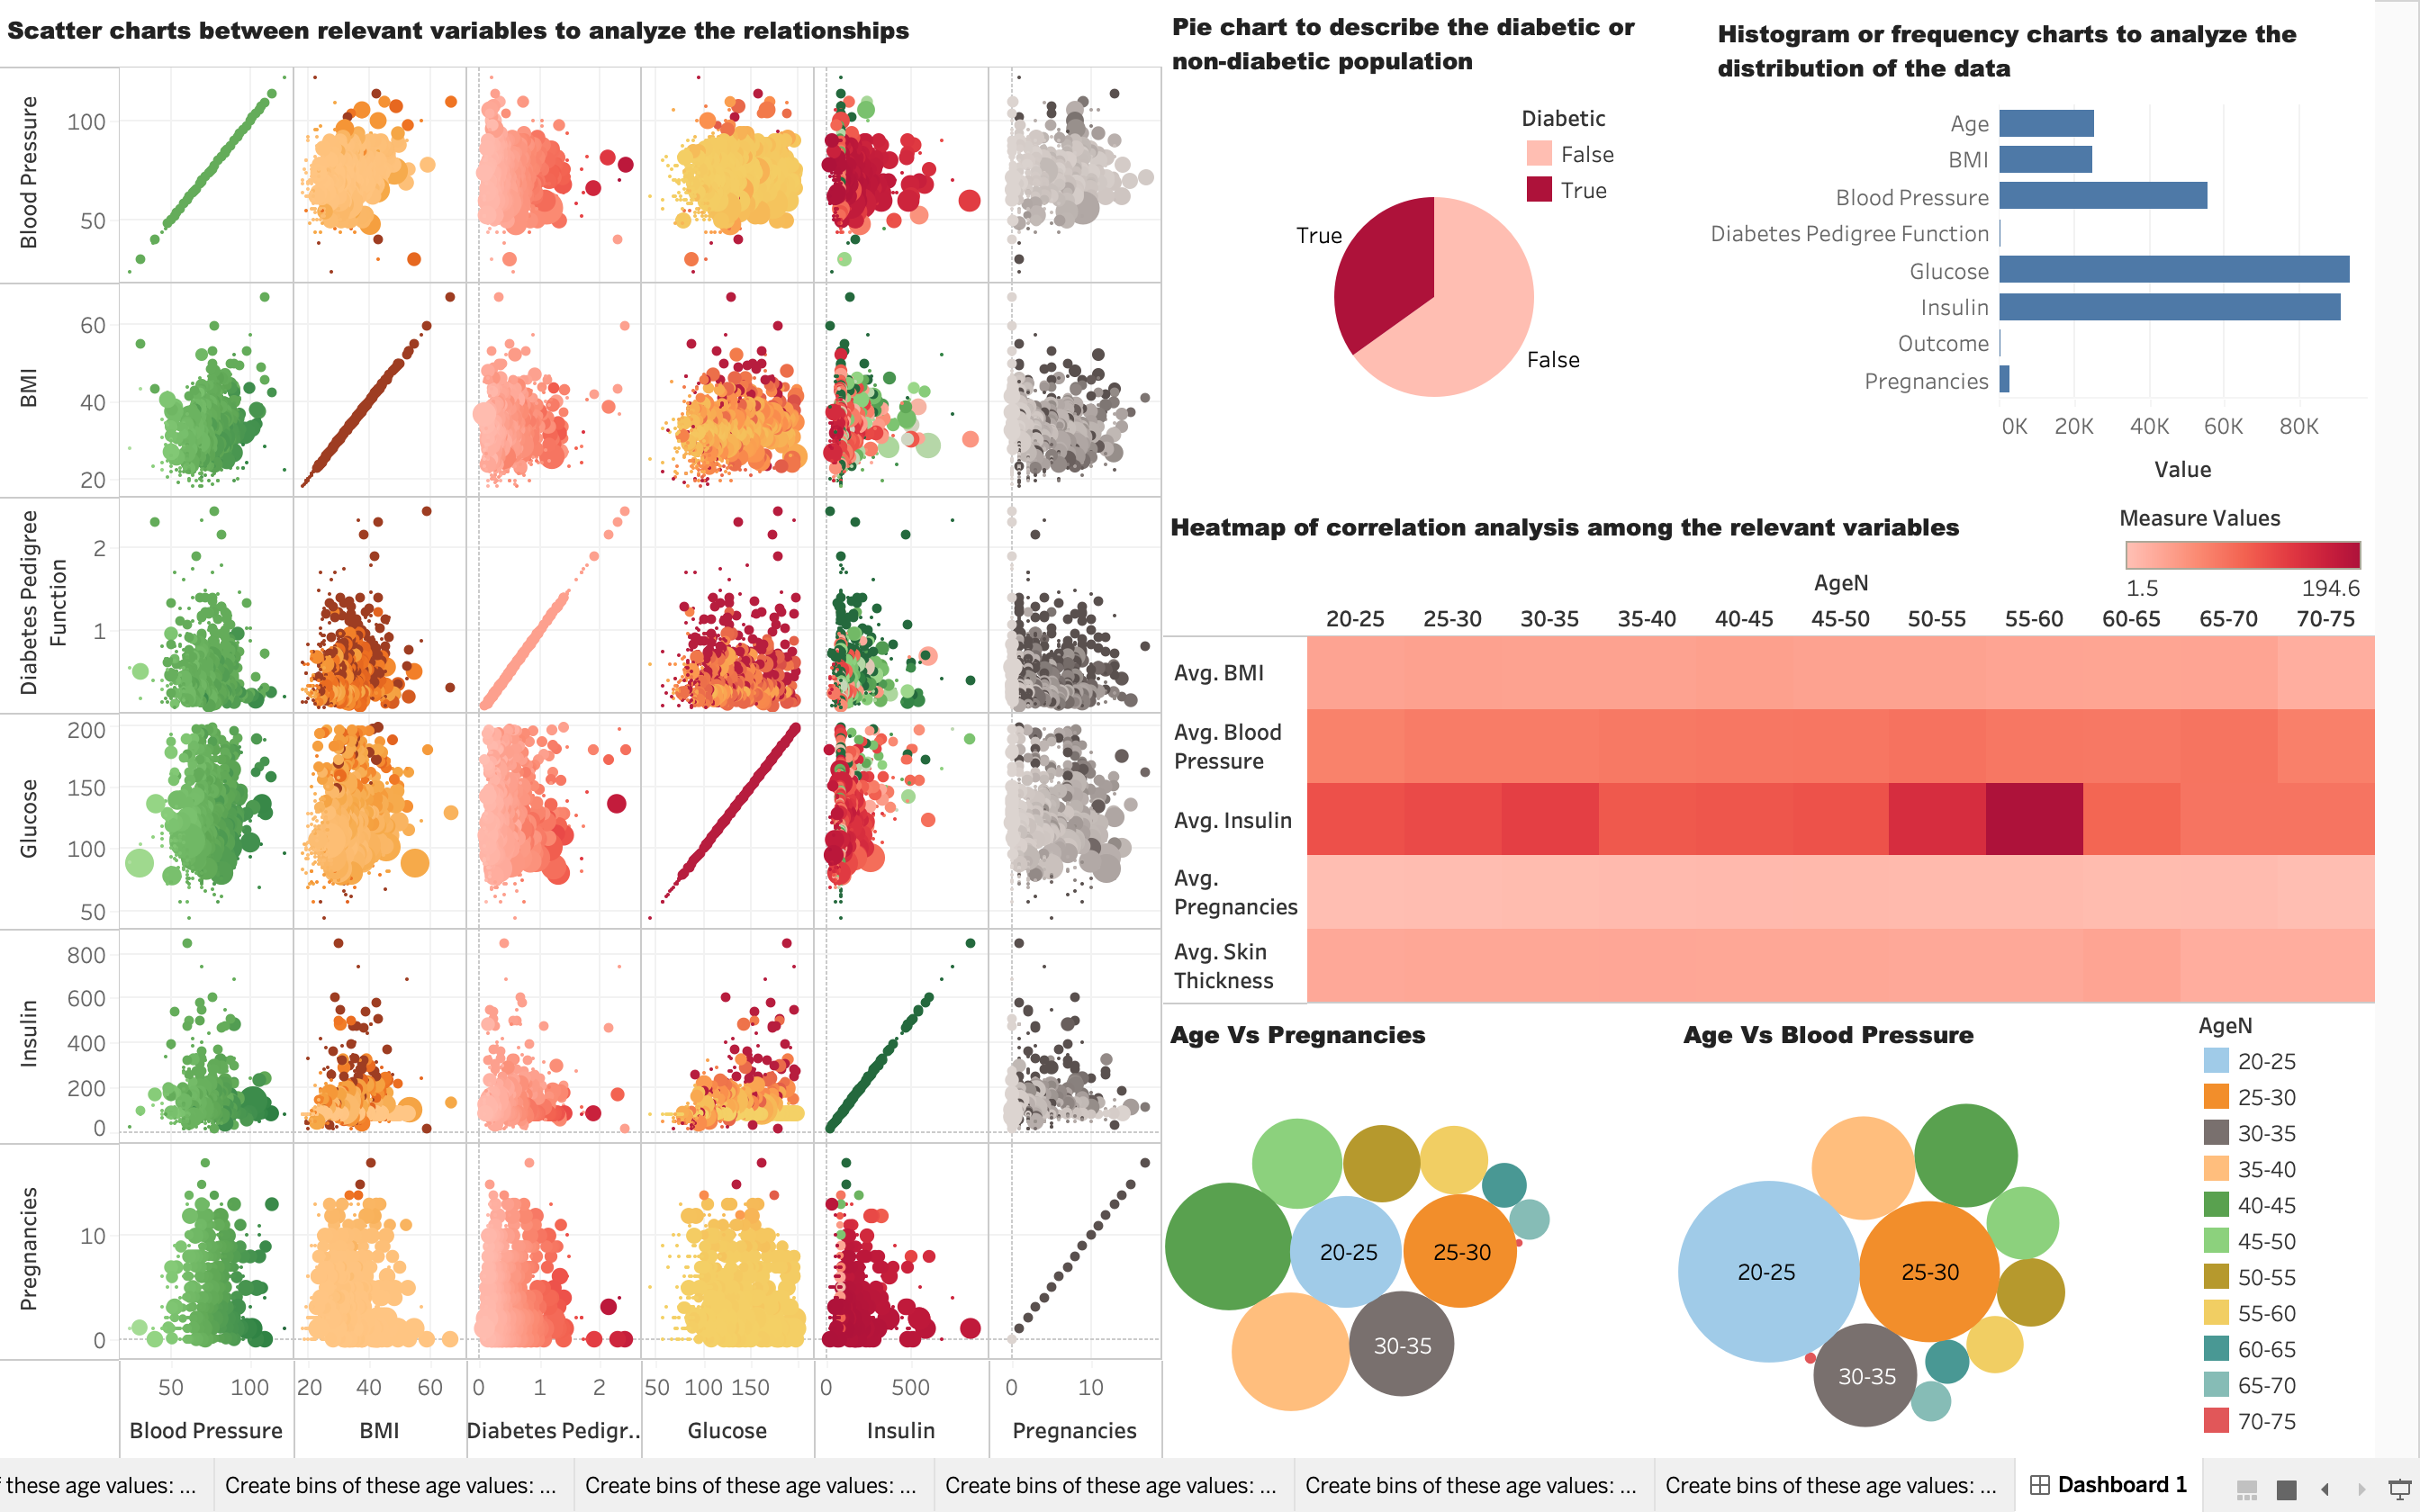

#### https://public.tableau.com/app/profile/rushikesh.khankar/viz/HealthCareCapstoneProjectDiabetesPrediction/Dashboard1?publish=yes

### Thank You